# **Data Preprocessing and Cleaning**

## Objectives

- Assessment and Handling of Missing Data:   
Identifying missing values in the dataset and making decisions about filling them in or removing them.

- Categorical Data Transformation:   
Applying encoding methods to convert categorical data into a format suitable for machine learning.

- Numerical Data Normalization:   
Processing numerical data, including scaling or normalization, to enhance the performance of machine learning models.

- Detection and Correction of Anomalies:   
Searching for and correcting data that may be erroneous or implausible.

- Documentation of the Preprocessing and Cleaning Process:   
Providing a detailed description of all steps and decisions taken during data preparation to ensure reproducibility and understanding of the process.

## Inputs

* outputs/datasets/collection/ChildrenAnemia.csv

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

We store our Jupyter notebooks in a subfolder of the project. Therefore, when we run the notebooks in the editor, we need to change the working directory. This is necessary to ensure proper access to data files and other project resources that might be located outside the notebook's subfolder.

We need to change the working directory from its current folder to its parent folder
- To access the current working directory, we use the os.getcwd() command.

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ChildrenAnemiaRisk/jupyter_notebooks'

Then, we change the working directory from its current folder to its parent folder to facilitate the correct file path references within our notebooks.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory



In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/ChildrenAnemiaRisk'

---

# Load collected data

In [5]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/ChildrenAnemia.csv"
df = pd.read_csv(df_raw_path)
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level mother,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level child adjusted for altitude (g/dl - 1 decimal),Anemia level child,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


---

# Data Preparation

### Exploring Unique Values in All Columns

Understanding the diversity and range of responses in each column of our dataset is crucial. This comprehensive check of unique values in all columns — both categorical and numerical — will help us grasp the data's characteristics more fully. It aids in identifying any irregularities or special cases in the data and is essential for planning necessary preprocessing steps. This step is particularly important for ensuring the data is ready for tasks such as machine learning model training, where specific data types and value ranges are required.

To understand the range of responses in each categorical column, it's important to identify all unique values. This will help in understanding the data's characteristics and in planning for any necessary data preprocessing, such as encoding categorical data for machine learning models.

In [6]:
# Printing unique values 

for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Age in 5-year groups': ['40-44' '35-39' '25-29' '20-24' '30-34' '15-19' '45-49']
Unique values in 'Type of place of residence': ['Urban' 'Rural']
Unique values in 'Highest educational level': ['Higher' 'Secondary' 'Primary' 'No education']
Unique values in 'Wealth index combined': ['Richest' 'Richer' 'Middle' 'Poorer' 'Poorest']
Unique values in 'Births in last five years': [1 2 3 4 5 6]
Unique values in 'Age of respondent at 1st birth': [22 28 26 25 21 30 32 19 23 24 20 15 18 17 14 33 27 16 13 12 31 36 34 35
 38 29 39 37 40 43 48 41 45 42]
Unique values in 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)': [ nan  95. 113. 121. 108. 116. 118. 134. 109. 101. 129. 102. 132. 111.
 142. 133. 138. 143. 137. 146. 119.  98. 140. 122. 124.  87. 123. 128.
 114. 107. 117. 105. 115. 147. 125.  96. 127. 106. 110.  90. 126. 103.
 151.  74. 112. 135. 120. 100.  94. 141.  91. 130. 139.  89. 131.  99.
 136. 104.  83.  65. 164.  62. 149.  93. 145. 144. 152.  86. 

### Replacing 'Don't know' Responses with NaN

In certain contexts, a response of "Don't know" may not provide meaningful information for our analysis. Particularly in cases where such responses are equivalent to a lack of data, it's beneficial to replace them with NaN (Not a Number). This is the case for our dataset, where "Don't know" responses in certain columns, such as whether the child's mother took iron supplements, are effectively the same as missing data. Converting these responses to NaN will streamline the dataset for more accurate analysis and modeling.

In [7]:
# Replacing 'Don't know' responses with NaN to treat them as missing data
import numpy as np
df.replace("Don't know", np.nan, inplace=True)
# check if there is "Don't know" value in Data
print("Don't know" in df.values)

False


---

# Missing Data

### Checking missing data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Counting missing values in each column

In [9]:
# This will help us understand which columns have missing data and how much
missing_values_count = df.isnull().sum()
# Printing the number of missing values in each column
print(missing_values_count)

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level mother                                                      20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

### Calculating the percentage of missing data

In [10]:
# This gives an idea of the scale of missing data in the entire dataset
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(f"Percentage of missing data: {(total_missing/total_cells) * 100}%")


Percentage of missing data: 19.110711139779575%


### Visualizing missing data

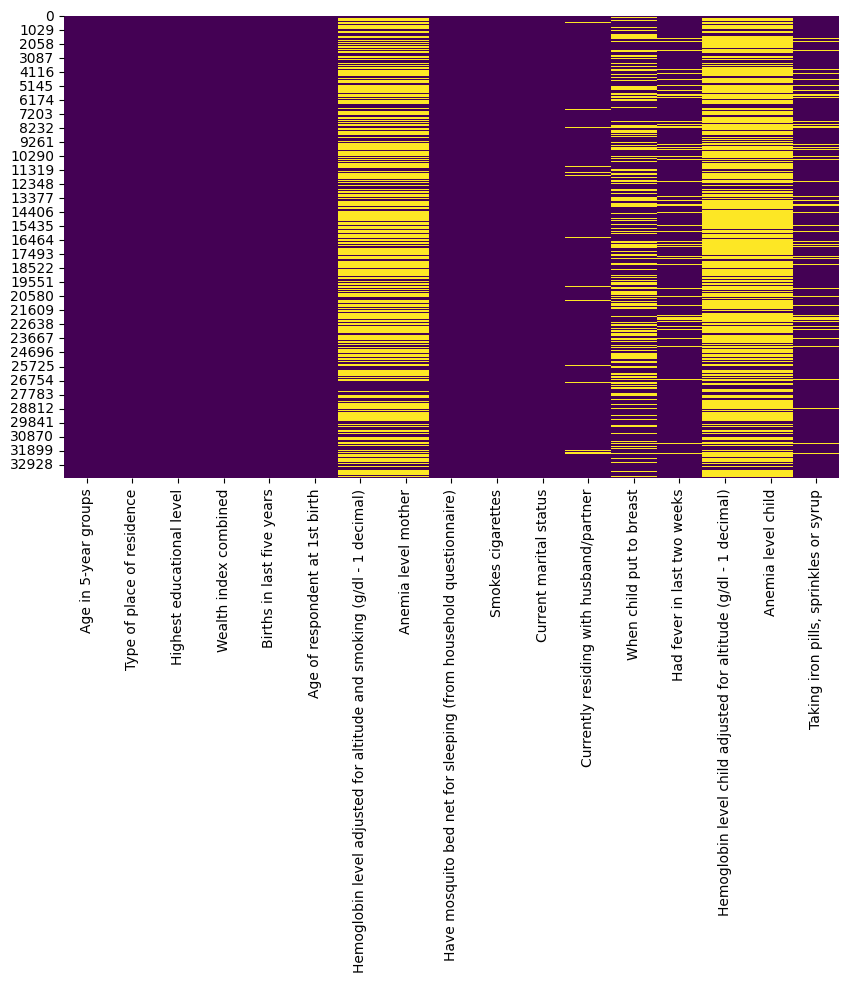

In [11]:
# A heatmap helps to visually inspect the presence of missing data across different columns
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### Removing rows and Verifying the Removal of Rows with missing 'Anemia level child' data
This step is crucial as the 'Anemia level child' column is essential for our analysis.  
Rows with missing data in this column will be removed to ensure the integrity and relevance of the dataset.  

To ensure that the rows with missing values in the 'Anemia level child' column have been successfully removed, we will perform several checks. This includes comparing the number of rows before and after removal, verifying that there are no missing values left in the column, and the common check.

In [12]:
# Counting the number of rows before removal
print("Number of rows before removal:", df.shape[0])

# Removing rows where 'Anemia level child' is missing
df.dropna(subset=['Anemia level child'], inplace=True)

# Resetting index of the DataFrame after row removal
df.reset_index(drop=True, inplace=True)

# Counting the number of rows after removal
print("Number of rows after removal:", df.shape[0])

# Check if there are any missing values left in 'Anemia level child'
if df['Anemia level child'].isna().sum() == 0:
    print("Missing values in 'Anemia level child' successfully removed.")
else:
    print("There are still missing values in 'Anemia level child'.")


Number of rows before removal: 33924
Number of rows after removal: 10182
Missing values in 'Anemia level child' successfully removed.


Visualizing missing values after removal

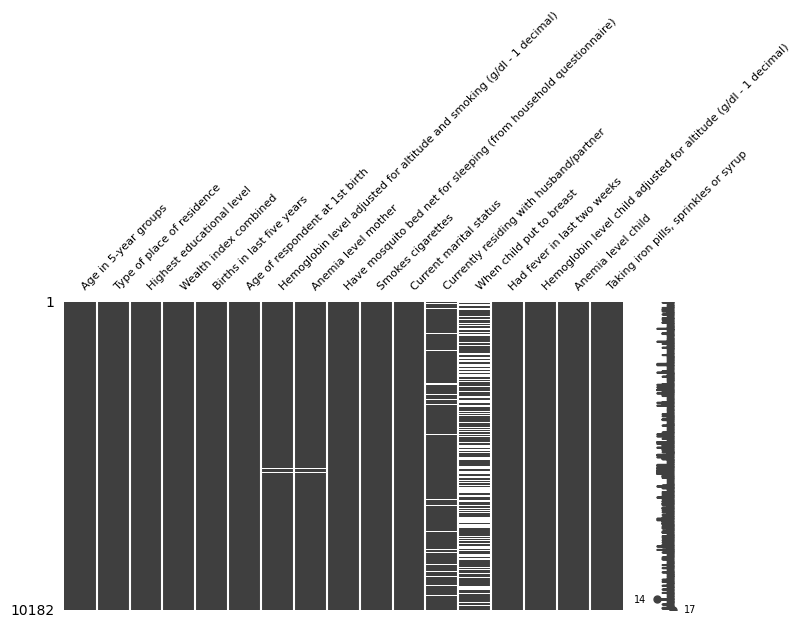

In [13]:
import missingno as msno

# Visualizing missing values using missingno
# Setting the figure size and font size
msno.matrix(df, figsize=(8, 4), fontsize=8)

# Displaying the plot
plt.show()

### Deleting column "When child put to breast"


Counting percentage of missing data in "When child put to breast"

In [14]:
missing_percentage = df['When child put to breast'].isna().mean() * 100
print(f"Percentage of missing data in 'When child put to breast': {missing_percentage}%")

Percentage of missing data in 'When child put to breast': 37.48772343351012%


After thorough consultation with the data provider and client, we have come to the decision to drop the 'When child put to breast' column from our dataset. This decision was made based on two key factors:  
- High percentage of missing data:   
Our analysis revealed that approximately 37.5% of the data in this column is missing. Such a high proportion of missing data can introduce bias and uncertainty into our models and analyses.  
- The non-critical nature of the data:   
Through our discussions, it was determined that the 'When child put to breast' data, while informative, is not critically significant for the primary objectives of our analysis.  
Given these considerations, we concluded that the most prudent course of action is to exclude this column from further analysis. This decision aligns with our objective to maintain the integrity and reliability of our dataset, ensuring that our analyses and conclusions are as accurate and meaningful as possible.

Despite deciding to remove the 'When child put to breast' column due to a high percentage of missing data, we recognize the potential value of the existing complete data in this сolumn.   
Therefore, we're extracting rows where 'When child put to breast' is not missing and saving them in a separate DataFrame.  
This allows us to preserve and possibly utilize these specific data points for further analysis in the future.

In [15]:
# Extracting rows where 'When child put to breast' is not missing
df_when_child_put_to_breast_complete = df.dropna(subset=['When child put to breast'])

# Displaying information about the new DataFrame
print("Number of rows in the new DataFrame:", len(df_when_child_put_to_breast_complete))
print(df_when_child_put_to_breast_complete.info())

# Saving this new DataFrame to a CSV file
df_when_child_put_to_breast_complete.to_csv("outputs/datasets/collection/ChildrenAnemiaBreastfeeding.csv", index=False)

Number of rows in the new DataFrame: 6365
<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 0 to 10181
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   6365 non-null   object 
 1   Type of place of residence                                             6365 non-null   object 
 2   Highest educational level                                              6365 non-null   object 
 3   Wealth index combined                                                  6365 non-null   object 
 4   Births in last five years                                              6365 non-null   int64  
 5   Age of respondent at 1st birth                                         6365 non-null   int64  
 6   Hemoglobin level adjusted for altitude and smoking

In [16]:
df.drop(columns=['When child put to breast'], inplace=True)

# Checking the results by displaying the updated columns of the DataFrame
print(df.columns)

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level mother',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner',
       'Had fever in last two weeks',
       'Hemoglobin level child adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level child', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')


### Finding out the percentages of the remaining missing data in each column

In [17]:
# Calculating the percentage of missing data in each column of the DataFrame
missing_percentage = df.isnull().mean() * 100

# Outputting the percentage of missing data for each column
print(missing_percentage)

Age in 5-year groups                                                     0.000000
Type of place of residence                                               0.000000
Highest educational level                                                0.000000
Wealth index combined                                                    0.000000
Births in last five years                                                0.000000
Age of respondent at 1st birth                                           0.000000
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    1.178550
Anemia level mother                                                      1.178550
Have mosquito bed net for sleeping (from household questionnaire)        0.000000
Smokes cigarettes                                                        0.000000
Current marital status                                                   0.000000
Currently residing with husband/partner                                  5.087409
Had fever in las

### Replacing Missing Data in "Currently residing with husband/partner" with "Unknown"

Given that the percentage of missing data in the "Currently residing with husband/partner" column is 5%, which is relatively acceptable, and considering that this data is not critical, a consultation with the client led to the decision to replace missing values in this column with "Unknown". This approach allows us to retain maximum information for use in further analysis.

In [18]:
# Replacing missing values in the column 'Currently residing with husband/partner' with 'Unknown'
df['Currently residing with husband/partner'].fillna('Unknown', inplace=True)

# Checking to ensure that the missing values have been replaced
print(df['Currently residing with husband/partner'].unique())

['Living with her' 'Staying elsewhere' 'Unknown']


### Further Evaluation and Handling of Remaining Missing Data

Following another round of scrutiny to assess the dataset after previous transformations, we have identified some columns that still contain missing values. These columns are as follows:
- Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal): 1.178550%
- Anemia level mother: 1.178550%
- Had fever in last two weeks: 0.019643%
- Taking iron pills, sprinkles or syrup: 0.304459%

To ensure the accuracy and integrity of our analysis, particularly for critical health parameters, the following strategies have been decided upon:

1. **Hemoglobin Level and Anemia Level (Mother):**
   Given the medical importance of these parameters and the relatively low percentage of missing data (around 1.18%), the decision is to remove rows with missing values in these columns. This approach maintains the precision of our analysis, as these parameters are crucial for anemia research.

2. **Had Fever in the Last Two Weeks:**
   With an extremely low percentage of missing data (around 0.02%), we will also remove rows with missing values. This will have a minimal impact on the overall dataset.

3. **Taking Iron Pills, Sprinkles or Syrup:**
   For this column, with around 0.3% missing data, we will replace missing values with a new category 'Unknown'. Since these data pertain to the use of iron supplements, the absence of information can be interpreted as 'unknown' or 'no data', providing useful insights for the analysis.

In [19]:
# Removing rows with missing values in 'Hemoglobin level adjusted for altitude and smoking' and 'Anemia level mother'
df.dropna(subset=['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'Anemia level mother'], inplace=True)

# Removing rows with missing values in 'Had fever in last two weeks'
df.dropna(subset=['Had fever in last two weeks'], inplace=True)

# Replacing missing values in 'Taking iron pills, sprinkles or syrup' with 'Unknown'
df['Taking iron pills, sprinkles or syrup'].fillna('Unknown', inplace=True)

# Verifying the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10060 entries, 0 to 10181
Data columns (total 16 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   10060 non-null  object 
 1   Type of place of residence                                             10060 non-null  object 
 2   Highest educational level                                              10060 non-null  object 
 3   Wealth index combined                                                  10060 non-null  object 
 4   Births in last five years                                              10060 non-null  int64  
 5   Age of respondent at 1st birth                                         10060 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  10060 non-null  floa

In [20]:
# Printing unique values 

for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Age in 5-year groups': ['25-29' '30-34' '35-39' '20-24' '15-19' '45-49' '40-44']
Unique values in 'Type of place of residence': ['Urban' 'Rural']
Unique values in 'Highest educational level': ['Secondary' 'Higher' 'No education' 'Primary']
Unique values in 'Wealth index combined': ['Richest' 'Richer' 'Poorer' 'Middle' 'Poorest']
Unique values in 'Births in last five years': [1 2 3 4 6]
Unique values in 'Age of respondent at 1st birth': [25 30 32 19 24 22 23 20 14 26 33 16 18 17 27 21 15 28 12 13 29 35 31 34
 37 39 38 36 40 45 43 42 41]
Unique values in 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)': [ 95. 113. 121. 108. 116. 118. 134. 109. 101. 129. 132. 142. 133. 138.
 143. 137. 146. 119.  98. 122. 124.  87. 123. 128. 114. 107. 115. 147.
 125.  96. 127. 106. 110. 103. 151.  74. 105. 112. 135. 120. 100.  94.
 126. 111. 141.  91. 102.  89. 131.  99. 117. 136.  90. 104. 130.  83.
  65. 140.  62. 139. 149.  93. 145. 152.  86.  81.  82.  88.  84. 

---

# Data Encoding

### Binary Encoding for Binary Categorical Data
For binary categorical variables such as   
- 'Type of place of residence',   
- 'Have mosquito bed net for sleeping',   
- 'Smokes cigarettes', we apply binary encoding.   
This method transforms these binary categories into a numeric format (0 or 1) that can be easily utilized by machine learning models.   
Additionally, for the '  
- Currently residing with husband/partner' and   
- 'Taking iron pills, sprinkles or syrup' columns,   
we encode 'Unknown' as -1 to distinguish it from 'Yes' and 'No'.

In [21]:
# Binary encoding
df['Type of place of residence'] = df['Type of place of residence'].map({'Urban': 1, 'Rural': 0})
df['Have mosquito bed net for sleeping (from household questionnaire)'] = df['Have mosquito bed net for sleeping (from household questionnaire)'].map({'Yes': 1, 'No': 0})
df['Smokes cigarettes'] = df['Smokes cigarettes'].map({'Yes': 1, 'No': 0})
df['Had fever in last two weeks'] = df['Had fever in last two weeks'].map({'Yes': 1, 'No': 0})
df['Currently residing with husband/partner'] = df['Currently residing with husband/partner'].map({'Living with her': 1, 'Staying elsewhere': 0, 'Unknown': -1})
df['Taking iron pills, sprinkles or syrup'] = df['Taking iron pills, sprinkles or syrup'].map({'Yes': 1, 'No': 0, 'Unknown': -1})


### One-Hot Encoding for Nominal Categorical Data
For nominal categorical variables with more than two categories, such as   
- 'Highest educational level',   
- 'Wealth index combined',   
- 'Current marital status',   
- 'Anemia level mother',   
- 'Anemia level child',   

we apply One-Hot Encoding.  
This encoding creates new columns for each category in the original variable and assigns binary values.   
This approach is suitable for machine learning algorithms that require numerical input.  


In [22]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Highest educational level', 'Wealth index combined', 'Current marital status', 'Anemia level mother', 'Anemia level child'])


### Creating one-hot encoded columns for 'Age in 5-year groups'
This method transforms the categorical age groups into individual binary columns for each age group

In [23]:
age_dummies = pd.get_dummies(df['Age in 5-year groups'])

# Concatenating the new columns with the original Data Frame
# This step adds the new binary columns to the existing dataset
df = pd.concat([df, age_dummies], axis=1)

# removing the original 'Age in 5-year groups' column if it's no longer needed
df.drop('Age in 5-year groups', axis=1, inplace=True)


In [24]:
# Viewing the first few rows of the DataFrame after encoding
print(df.head())

   Type of place of residence  Births in last five years  \
0                           1                          1   
1                           1                          1   
2                           1                          2   
3                           1                          1   
4                           1                          1   

   Age of respondent at 1st birth  \
0                              25   
1                              30   
2                              32   
3                              19   
4                              24   

   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  \
0                                               95.0                       
1                                              113.0                       
2                                              121.0                       
3                                              108.0                       
4                                   

---

# Push to Repo

Push file with Cleaned Data to Repo.

In [25]:

try:
    os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
    print(e)

output_file_path = "outputs/datasets/cleaned/ChildrenAnemia_cleaned.csv"

df.to_csv(output_file_path, index=False)


[Errno 17] File exists: 'outputs/datasets/cleaned'


# Converting Boolean Values to Numerical Format and Push to Repo

In this section, we perform a conversion of all boolean columns in our DataFrame to numerical format. This transformation is carried out immediately after cleaning and saving our data, ensuring that our dataset is ready for subsequent analytical tasks and machine learning processes. Converting boolean values to 0 (False) and 1 (True) simplifies the dataset and makes it more compatible with various data analysis techniques and algorithms, which typically operate more efficiently with numerical data.

This step is crucial in streamlining the data preparation process and facilitating more straightforward data analysis, as numerical data can be more easily manipulated and analyzed using standard statistical and machine learning methods.

In [26]:
# Load the cleaned data
df = pd.read_csv('outputs/datasets/cleaned/ChildrenAnemia_cleaned.csv')

# Convert all boolean columns to numerical format (0 and 1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Save the DataFrame with numeric values
output_file_path_numeric = "outputs/datasets/cleaned/ChildrenAnemia_cleaned_numeric.csv"
df.to_csv(output_file_path_numeric, index=False)

# Confirmation message
print("DataFrame with numeric values saved successfully.")

DataFrame with numeric values saved successfully.
